In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

df = pd.read_csv('nm_sal_yr_pos_gp_min_ovr_ya_nS.csv', index_col = [0])

In [7]:

YY = []
YYs = []
XX = []
XXs = []

count = 0
for ovr in set(df['overall']):
    df1 = df[df['overall'] == ovr]
    all_minutes = []
    for nm in set(df1['name']):
        minutes = []
        for i in range(0,4):
            try:
                df2 = df1[(df1['name'] == nm) & (df1['yearsAfter'] == i)]
                df2 = df2.head(1)
                stats = df2.values[0]
                minutes.append(stats[4] * stats[5])
                if stats[1] == 0:
                    add = 1
                else:
                    add = 0
            except:
                minutes.append(1)
                pass
            #print(minutes)
        all_minutes.append(minutes)
        
        
        

    
    s = np.sum(all_minutes, 1)
#     [ 8752.7  9481.2  1903.4  8447.8  5725.7  8821.9  9656.3 13060.1 11816.2
#   1815.4  8470.3  5660.   8862.9 11223.2 10269.6 11040.   9576.3 11370.2
#   8098.   8832. ]
    
    #display(all_minutes)
    #display(s)
    

    am=(np.array(all_minutes).T/s).T
#     [[1.86399625e-01 2.12985707e-01 2.80713380e-01 3.19901288e-01]
# ...
#      ...
#  [1.23487281e-04 3.83773771e-01 2.95035811e-01 3.21066930e-01]
#  [1.76120924e-01 2.31804801e-01 2.82971014e-01 3.09103261e-01]]
    #display(am)


    amins=np.array(am)
    

    
    xx=np.sum(am*amins,1)
#     [0.26124457 0.25324626 0.36266856 0.26997517 0.29291703 0.25280614
#  0.25105543 0.25027539 0.25073333 0.59834072 0.26454405 0.50227041
#  0.33353565 0.2580001  0.26817555 0.25681895 0.26103659 0.25164858
#  0.33741243 0.26036947]
    
    tm=np.sum(np.array(all_minutes),1)
    
    YY.append(xx.mean())
    YYs.append(xx.std()) 
    
    XX.append(tm.mean())
    XXs.append(tm.std())
    
XXs = np.array(XXs) 
XX = np.array(XX) 

ex = sum(XXs)/60
ey = sum(XX)/60
display(ex/ey)

display(sum(XXs)/60)
display(sum(XX)/60)
display(ex/ey)

2304.167036737935

3198.9309802248067

0.7202928262541033

<Figure size 640x480 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

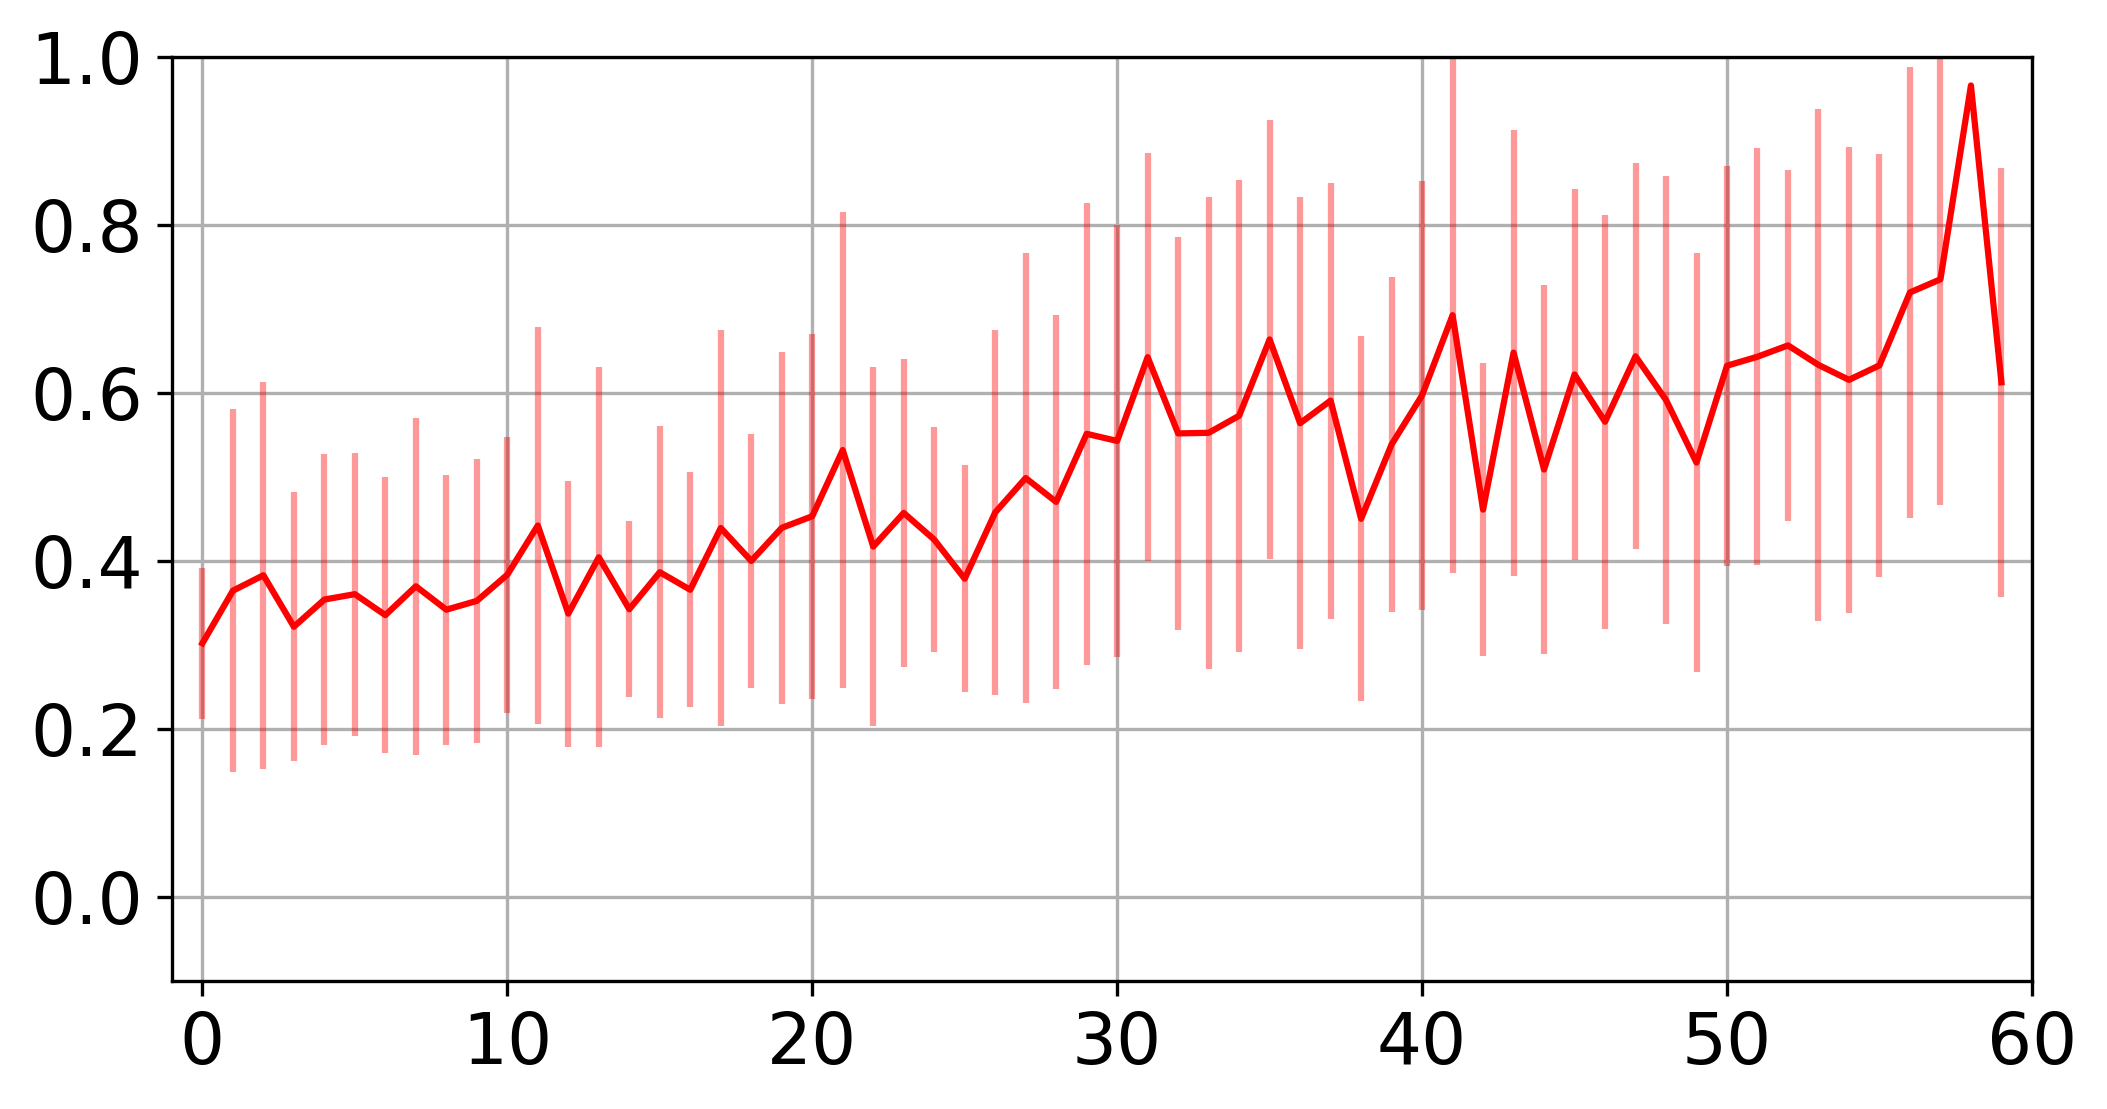

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.clf()
ax = plt.figure(dpi=300,figsize=(8,4)).add_subplot()
x = np.arange(0.0, 60.0, 1)
ax.errorbar(x, YY, YYs, alpha = 0.4,ls='none',c='r')
ax.plot(x,YY,c='r')

    
ax.set_xlim(-1, 60)
ax.set_ylim(-0.1, 1)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)

ax.grid()
#ax.legend(['Drafted Season', 'Second Season', 'Third Season'])
#plt.legend(loc="upper left", bbox_to_anchor=(1.2,1.0))

#     plt.savefig('SixteenPie.png')
plt.show() #normalized minutes of first 4 years vs draft pick

<Figure size 640x480 with 0 Axes>

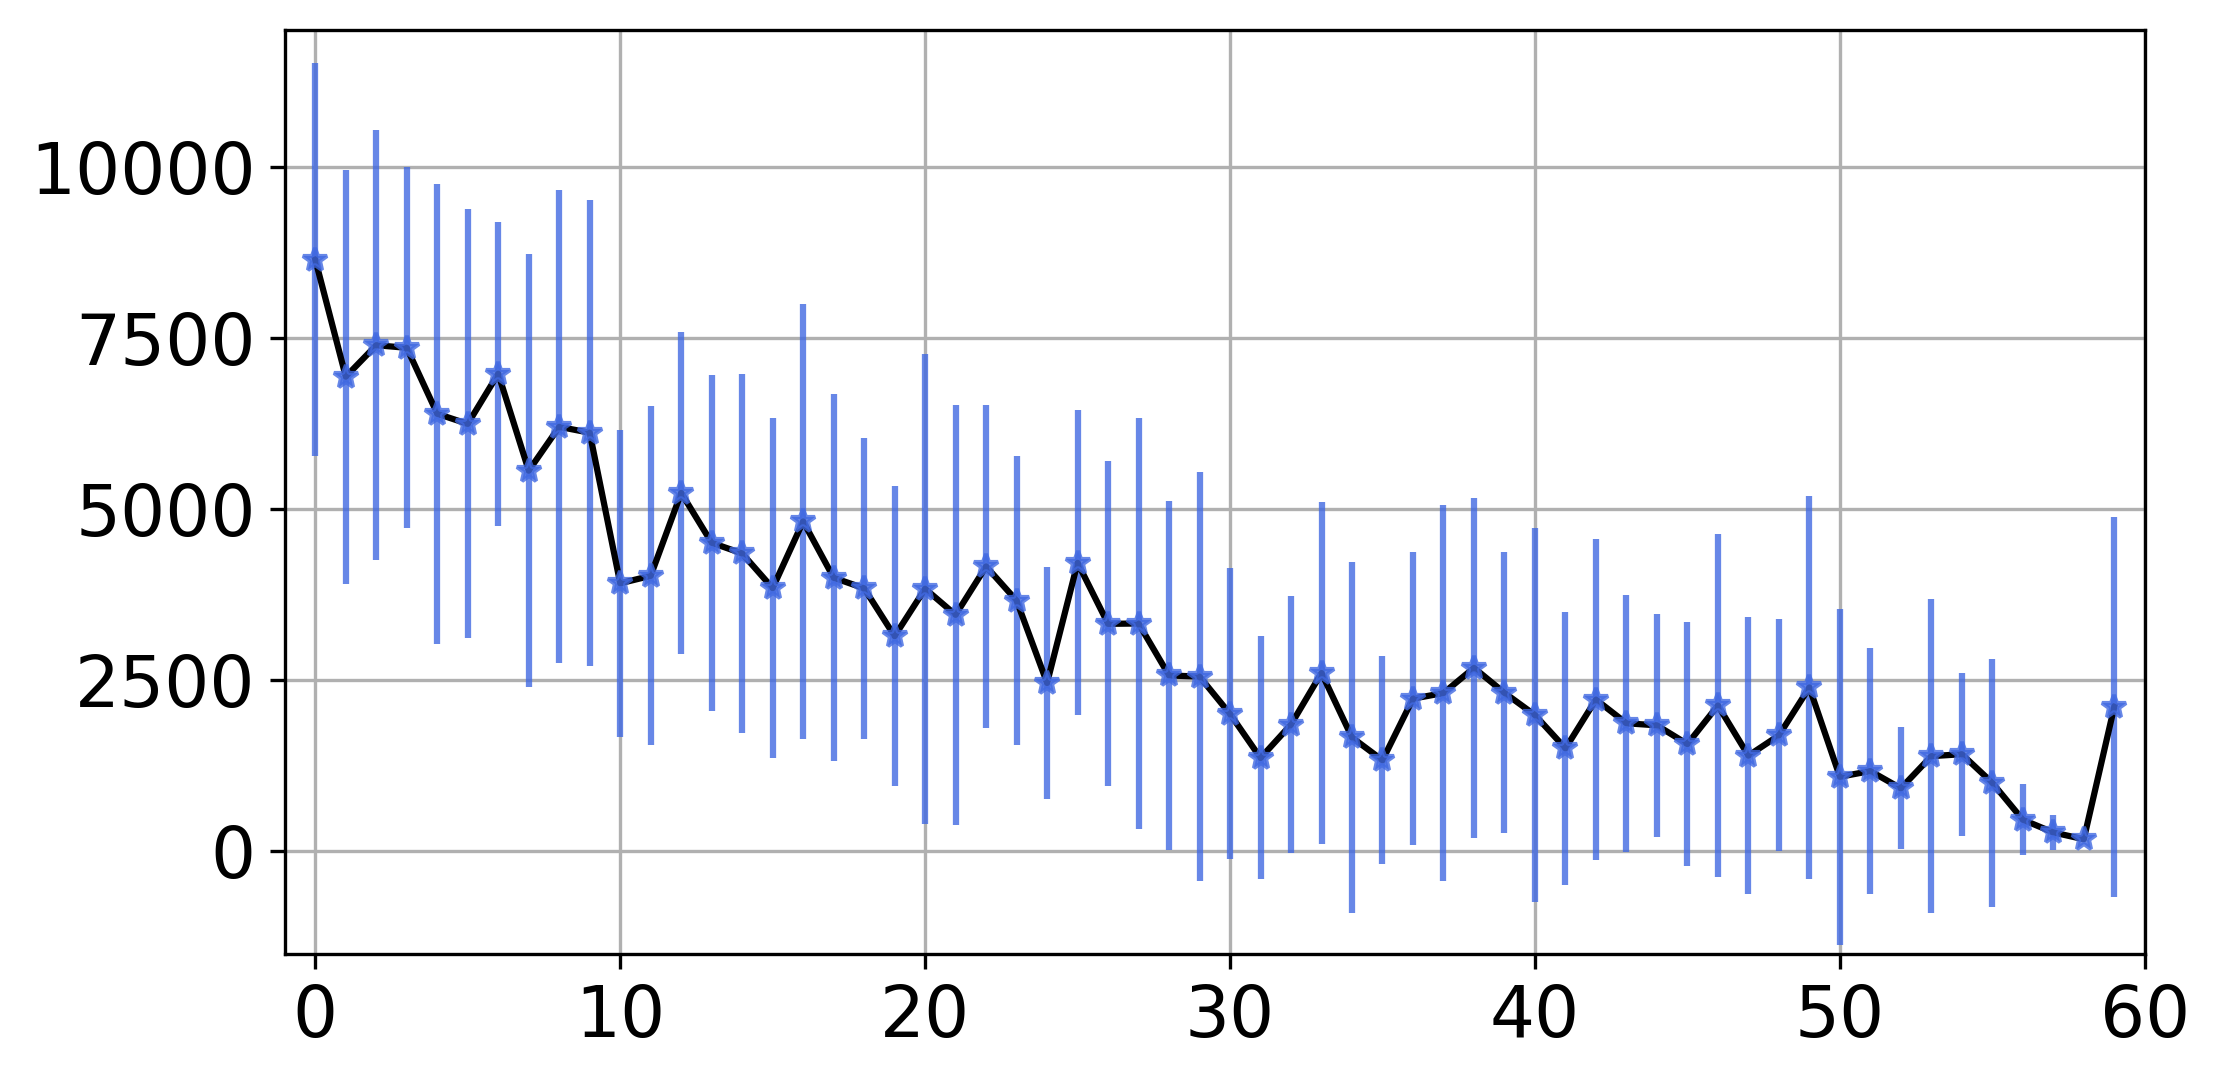

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.clf()
ax = plt.figure(dpi=300,figsize=(8,4)).add_subplot()
x = np.arange(0.0, 60.0, 1)
ax.errorbar(x, XX, XXs, alpha = 0.8,ls='none',c='royalblue',marker = '*')
ax.plot(x,XX,c='black')

    
ax.set_xlim(-1, 60)
ax.set_ylim(-1500, 12000)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)

ax.grid()
#ax.legend(['Drafted Season', 'Second Season', 'Third Season'])
#plt.legend(loc="upper left", bbox_to_anchor=(1.2,1.0))

#     plt.savefig('SixteenPie.png')
plt.savefig('TotalMin vs OVR.png')
plt.show() 


#total minutes of first 4 years vs draft pick
#x-axis is draft pick
#y-axis is total average minutes
